# Problem

# To predict the price of vehicle

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier  

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import json


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Gathering 

In [2]:
df=pd.read_csv('ElectricCarData_Clean.csv')
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [4]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [5]:
df.head().T

,0,1,2,3,4
Brand,Tesla,Volkswagen,Polestar,BMW,Honda
Model,Model 3 Long Range Dual Motor,ID.3 Pure,2,iX3,e
AccelSec,4.6,10.0,4.7,6.8,9.5
TopSpeed_KmH,233,160,210,180,145
Range_Km,450,270,400,360,170
Efficiency_WhKm,161,167,181,206,168
FastCharge_KmH,940,250,620,560,190
RapidCharge,Yes,Yes,Yes,Yes,Yes
PowerTrain,AWD,RWD,AWD,RWD,RWD
PlugType,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS


In [6]:
df.shape

(103, 14)

In [7]:
df.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


<AxesSubplot:>

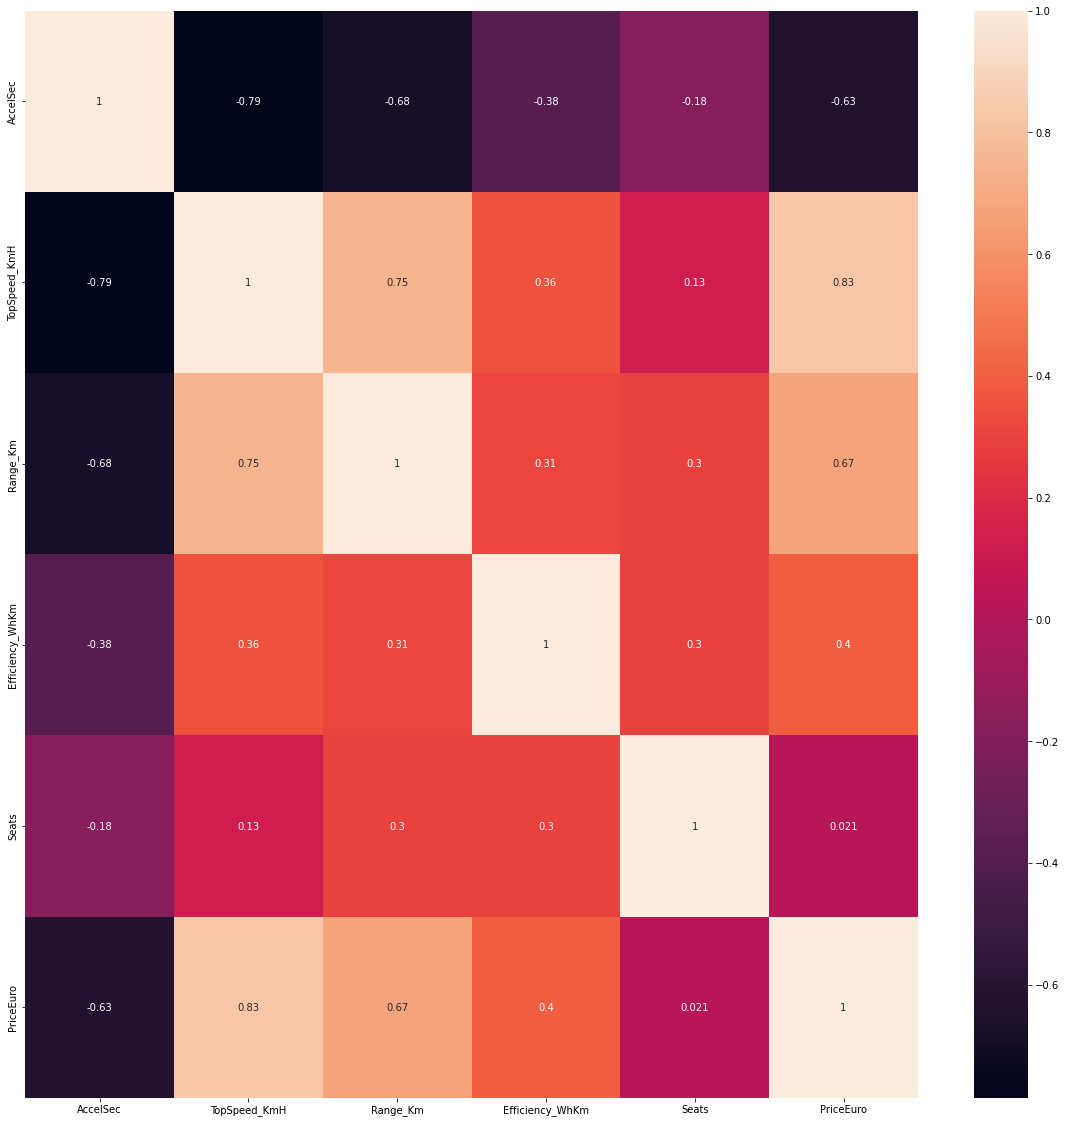

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

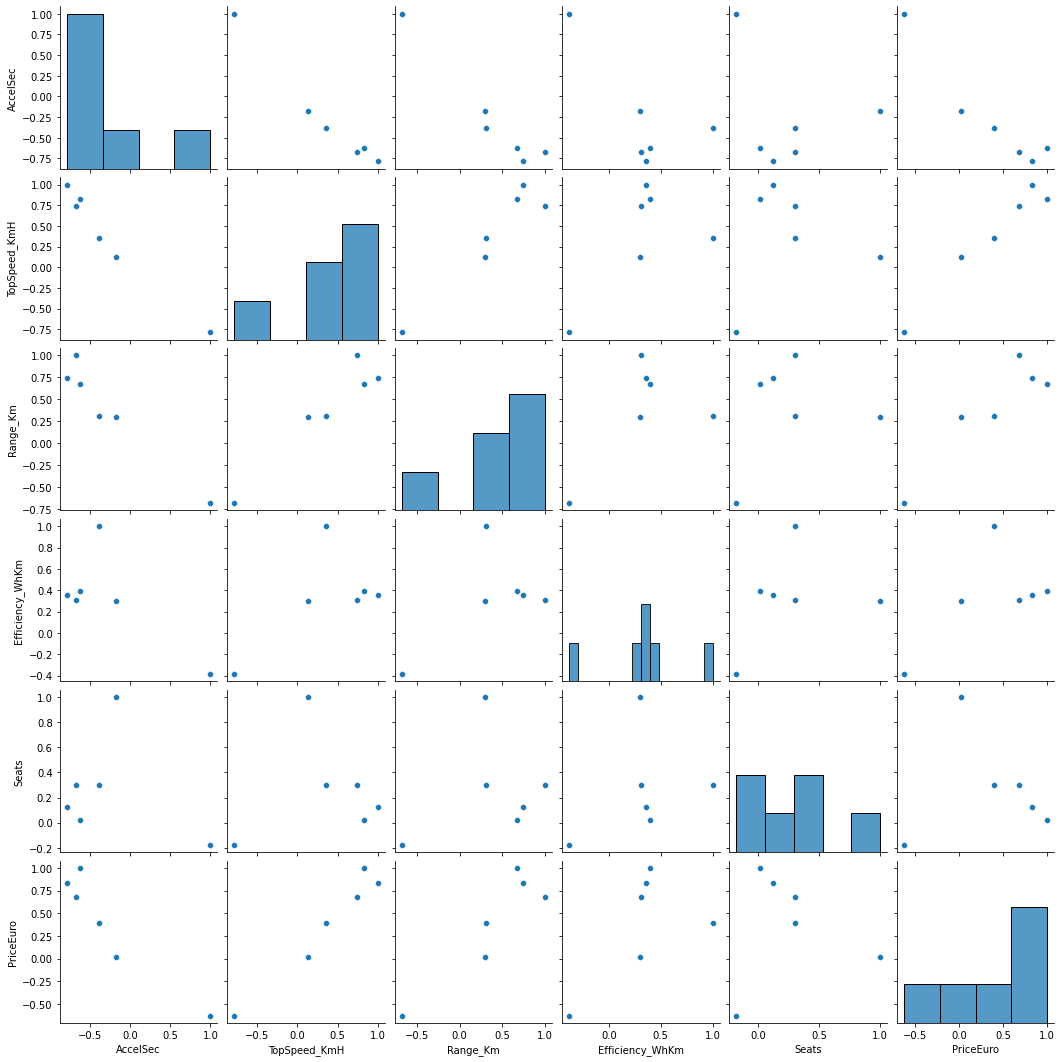

In [9]:
sns.pairplot(df.corr())


In [10]:
df.head().T

,0,1,2,3,4
Brand,Tesla,Volkswagen,Polestar,BMW,Honda
Model,Model 3 Long Range Dual Motor,ID.3 Pure,2,iX3,e
AccelSec,4.6,10.0,4.7,6.8,9.5
TopSpeed_KmH,233,160,210,180,145
Range_Km,450,270,400,360,170
Efficiency_WhKm,161,167,181,206,168
FastCharge_KmH,940,250,620,560,190
RapidCharge,Yes,Yes,Yes,Yes,Yes
PowerTrain,AWD,RWD,AWD,RWD,RWD
PlugType,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS


In [11]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [12]:
df['RapidCharge'].value_counts()

Yes    98
No      5
Name: RapidCharge, dtype: int64

In [13]:
df['RapidCharge'].replace({'Yes':1,'No':0},inplace=True)
df['RapidCharge']

0      1
1      1
2      1
3      1
4      1
      ..
98     1
99     1
100    1
101    1
102    1
Name: RapidCharge, Length: 103, dtype: int64

In [14]:
RapidCharge_values={'YES':1,'NO':0}

In [15]:
df['FastCharge_KmH'].value_counts()

230    6
440    5
540    5
-      5
380    5
470    4
560    4
190    4
260    3
170    3
420    3
210    3
490    2
710    2
270    2
450    2
350    2
330    2
590    2
550    2
340    2
480    2
650    2
220    2
620    2
390    2
410    1
770    1
460    1
740    1
360    1
810    1
290    1
430    1
510    1
320    1
890    1
940    1
520    1
900    1
920    1
730    1
610    1
570    1
240    1
250    1
910    1
850    1
930    1
780    1
500    1
Name: FastCharge_KmH, dtype: int64

In [16]:
df.value_counts();

In [17]:
df['PowerTrain'].replace({'AWD':0,'RWD':1,'FWD':2},inplace=True)
df['PowerTrain']

0      0
1      1
2      0
3      1
4      1
      ..
98     2
99     0
100    0
101    0
102    0
Name: PowerTrain, Length: 103, dtype: int64

In [18]:
PowerTrain_values={'AWD':0,'RWD':1,'FWD':2}

In [19]:
df['PlugType'].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [20]:
df = pd.get_dummies(df ,columns=['PlugType'])
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Segment,Seats,PriceEuro,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,Sedan,D,5,55480,0,0,1,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,Hatchback,C,5,30000,0,0,1,0
2,Polestar,2,4.7,210,400,181,620,1,0,Liftback,D,5,56440,0,0,1,0
3,BMW,iX3,6.8,180,360,206,560,1,1,SUV,D,5,68040,0,0,1,0
4,Honda,e,9.5,145,170,168,190,1,1,Hatchback,B,4,32997,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,Hatchback,C,5,45000,0,0,1,0
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,SUV,E,5,96050,0,0,1,0
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,Hatchback,C,5,50000,0,0,1,0
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,Hatchback,C,5,65000,0,0,1,0


In [21]:
df['BodyStyle'].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

In [22]:
df = pd.get_dummies(df ,columns=['BodyStyle'])
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Segment,...,PlugType_Type 2 CHAdeMO,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,D,...,0,0,0,0,0,0,0,0,1,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,C,...,0,0,1,0,0,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,1,0,D,...,0,0,0,1,0,0,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,1,1,D,...,0,0,0,0,0,0,0,1,0,0
4,Honda,e,9.5,145,170,168,190,1,1,B,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,C,...,0,0,1,0,0,0,0,0,0,0
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,E,...,0,0,0,0,0,0,0,1,0,0
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,C,...,0,0,1,0,0,0,0,0,0,0
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,C,...,0,0,1,0,0,0,0,0,0,0


In [23]:
df['Segment'].value_counts()

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

In [24]:
df = pd.get_dummies(df ,columns=['Segment'])
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,5,...,1,0,0,0,0,1,0,0,0,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,5,...,0,0,0,0,1,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,1,0,5,...,0,0,0,0,0,1,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,1,1,5,...,0,0,0,0,0,1,0,0,0,0
4,Honda,e,9.5,145,170,168,190,1,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,5,...,0,0,0,0,1,0,0,0,0,0
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,5,...,0,0,0,0,0,0,1,0,0,0
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,5,...,0,0,0,0,1,0,0,0,0,0
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,5,...,0,0,0,0,1,0,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    103 non-null    object 
 1   Model                    103 non-null    object 
 2   AccelSec                 103 non-null    float64
 3   TopSpeed_KmH             103 non-null    int64  
 4   Range_Km                 103 non-null    int64  
 5   Efficiency_WhKm          103 non-null    int64  
 6   FastCharge_KmH           103 non-null    object 
 7   RapidCharge              103 non-null    int64  
 8   PowerTrain               103 non-null    int64  
 9   Seats                    103 non-null    int64  
 10  PriceEuro                103 non-null    int64  
 11  PlugType_Type 1 CHAdeMO  103 non-null    uint8  
 12  PlugType_Type 2          103 non-null    uint8  
 13  PlugType_Type 2 CCS      103 non-null    uint8  
 14  PlugType_Type 2 CHAdeMO  1

In [26]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,Seats,PriceEuro,PlugType_Type 1 CHAdeMO,PlugType_Type 2,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,0.951456,0.961165,4.883495,55811.563107,0.009709,0.087379,...,0.097087,0.009709,0.067961,0.213592,0.291262,0.145631,0.097087,0.116505,0.058252,0.009709
std,3.017430,43.573030,126.014444,29.566839,0.215963,0.873603,0.795834,34134.665280,0.098533,0.283770,...,0.297525,0.098533,0.252910,0.411846,0.456566,0.354461,0.297525,0.322398,0.235365,0.098533
min,2.100000,123.000000,95.000000,104.000000,0.000000,0.000000,2.000000,20129.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,150.000000,250.000000,168.000000,1.000000,0.000000,5.000000,34429.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.300000,160.000000,340.000000,180.000000,1.000000,1.000000,5.000000,45000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,200.000000,400.000000,203.000000,1.000000,2.000000,5.000000,65000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.400000,410.000000,970.000000,273.000000,1.000000,2.000000,7.000000,215000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df['FastCharge_KmH'].replace({'-':0},inplace=True)
df['FastCharge_KmH']

0      940
1      250
2      620
3      560
4      190
      ... 
98     440
99     540
100    440
101    450
102    480
Name: FastCharge_KmH, Length: 103, dtype: object

In [28]:
df['FastCharge_KmH']=df['FastCharge_KmH'].astype(int)
df['FastCharge_KmH']

0      940
1      250
2      620
3      560
4      190
      ... 
98     440
99     540
100    440
101    450
102    480
Name: FastCharge_KmH, Length: 103, dtype: int32

In [29]:
df['FastCharge_KmH'].replace({'0':440},inplace=True)
df['FastCharge_KmH']

0      940
1      250
2      620
3      560
4      190
      ... 
98     440
99     540
100    440
101    450
102    480
Name: FastCharge_KmH, Length: 103, dtype: int32

In [30]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,PriceEuro,PlugType_Type 1 CHAdeMO,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,434.563107,0.951456,0.961165,4.883495,55811.563107,0.009709,...,0.097087,0.009709,0.067961,0.213592,0.291262,0.145631,0.097087,0.116505,0.058252,0.009709
std,3.017430,43.573030,126.014444,29.566839,219.660061,0.215963,0.873603,0.795834,34134.665280,0.098533,...,0.297525,0.098533,0.252910,0.411846,0.456566,0.354461,0.297525,0.322398,0.235365,0.098533
min,2.100000,123.000000,95.000000,104.000000,0.000000,0.000000,0.000000,2.000000,20129.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,1.000000,0.000000,5.000000,34429.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,1.000000,5.000000,45000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,2.000000,5.000000,65000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,2.000000,7.000000,215000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    103 non-null    object 
 1   Model                    103 non-null    object 
 2   AccelSec                 103 non-null    float64
 3   TopSpeed_KmH             103 non-null    int64  
 4   Range_Km                 103 non-null    int64  
 5   Efficiency_WhKm          103 non-null    int64  
 6   FastCharge_KmH           103 non-null    int32  
 7   RapidCharge              103 non-null    int64  
 8   PowerTrain               103 non-null    int64  
 9   Seats                    103 non-null    int64  
 10  PriceEuro                103 non-null    int64  
 11  PlugType_Type 1 CHAdeMO  103 non-null    uint8  
 12  PlugType_Type 2          103 non-null    uint8  
 13  PlugType_Type 2 CCS      103 non-null    uint8  
 14  PlugType_Type 2 CHAdeMO  1

In [32]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,5,...,1,0,0,0,0,1,0,0,0,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,5,...,0,0,0,0,1,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,1,0,5,...,0,0,0,0,0,1,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,1,1,5,...,0,0,0,0,0,1,0,0,0,0
4,Honda,e,9.5,145,170,168,190,1,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,5,...,0,0,0,0,1,0,0,0,0,0
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,5,...,0,0,0,0,0,0,1,0,0,0
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,5,...,0,0,0,0,1,0,0,0,0,0
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,5,...,0,0,0,0,1,0,0,0,0,0


# Feature Engineering 

<AxesSubplot:xlabel='AccelSec'>

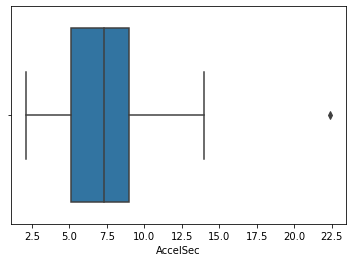

In [33]:
sns.boxplot(x=df['AccelSec'])

In [34]:
q1_AccelSec = df['AccelSec'].quantile(0.25)
q2_AccelSec = df['AccelSec'].quantile(0.50)
q3_AccelSec = df['AccelSec'].quantile(0.75)
median =  df['AccelSec'].median()
print("Q1 :",q1_AccelSec)
print("Q2 :",q2_AccelSec)
print("Q3 :",q3_AccelSec)
print("median :",median)

iqr = q3_AccelSec - q1_AccelSec

upper_tail = q3_AccelSec + 1.5*iqr
lower_tail = q1_AccelSec - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 5.1
Q2 : 7.3
Q3 : 9.0
median : 7.3
Upper Tail : 14.850000000000001
Lower Tail : -0.7500000000000009


In [35]:
median_AccelSec= df.loc[(df['AccelSec'] <= upper_tail) & 
                            (df['AccelSec'] >= lower_tail),'AccelSec'].median()
median_AccelSec 

7.3

<AxesSubplot:xlabel='AccelSec'>

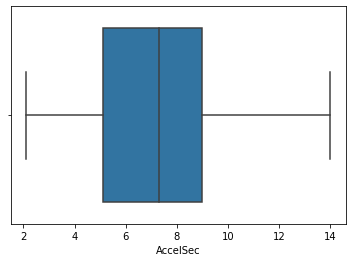

In [36]:
df.loc[(df['AccelSec'] > upper_tail) |
                            (df['AccelSec'] < lower_tail),'AccelSec'] = median_AccelSec
sns.boxplot(x=df['AccelSec'])

<AxesSubplot:xlabel='TopSpeed_KmH'>

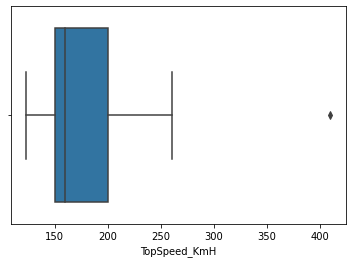

In [37]:
sns.boxplot(x=df['TopSpeed_KmH'])

In [38]:
q1_TopSpeed_KmH = df['TopSpeed_KmH'].quantile(0.25)
q2_TopSpeed_KmH = df['TopSpeed_KmH'].quantile(0.50)
q3_TopSpeed_KmH = df['TopSpeed_KmH'].quantile(0.75)
median =  df['TopSpeed_KmH'].median()
print("Q1 :",q1_TopSpeed_KmH)
print("Q2 :",q2_TopSpeed_KmH)
print("Q3 :",q3_TopSpeed_KmH)
print("median :",median)

iqr = q3_TopSpeed_KmH - q1_TopSpeed_KmH

upper_tail = q3_TopSpeed_KmH + 1.5*iqr
lower_tail = q1_TopSpeed_KmH - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 150.0
Q2 : 160.0
Q3 : 200.0
median : 160.0
Upper Tail : 275.0
Lower Tail : 75.0


In [39]:
median_TopSpeed_KmH= df.loc[(df['TopSpeed_KmH'] <= upper_tail) & 
                            (df['TopSpeed_KmH'] >= lower_tail),'TopSpeed_KmH'].median()
median_TopSpeed_KmH

160.0

<AxesSubplot:xlabel='TopSpeed_KmH'>

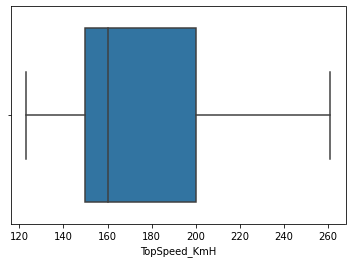

In [40]:
df.loc[(df['TopSpeed_KmH'] > upper_tail) |
                            (df['TopSpeed_KmH'] < lower_tail),'TopSpeed_KmH'] = median_TopSpeed_KmH
sns.boxplot(x=df['TopSpeed_KmH'])

<AxesSubplot:xlabel='Range_Km'>

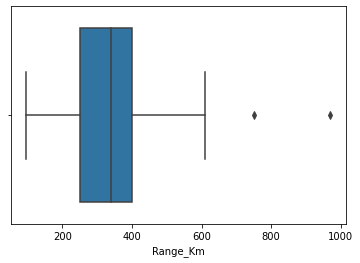

In [41]:
sns.boxplot(x=df['Range_Km'])

In [42]:
q1_Range_Km = df['Range_Km'].quantile(0.25)
q2_Range_Km = df['Range_Km'].quantile(0.50)
q3_Range_Km = df['Range_Km'].quantile(0.75)
median =  df['Range_Km'].median()
print("Q1 :",q1_Range_Km)
print("Q2 :",q2_Range_Km)
print("Q3 :",q3_Range_Km)
print("median :",median)

iqr = q3_Range_Km - q1_Range_Km

upper_tail = q3_Range_Km + 1.5*iqr
lower_tail = q1_Range_Km - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 250.0
Q2 : 340.0
Q3 : 400.0
median : 340.0
Upper Tail : 625.0
Lower Tail : 25.0


In [43]:
median_Range_Km= df.loc[(df['Range_Km'] <= upper_tail) & 
                            (df['Range_Km'] >= lower_tail),'Range_Km'].median()
median_Range_Km

340.0

<AxesSubplot:xlabel='Range_Km'>

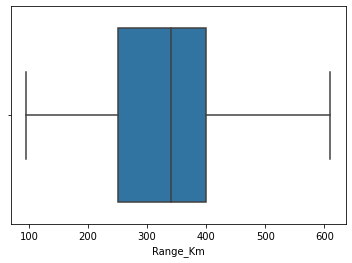

In [44]:
df.loc[(df['Range_Km'] > upper_tail) |
                            (df['Range_Km'] < lower_tail),'Range_Km'] = median_Range_Km
sns.boxplot(x=df['Range_Km'])

<AxesSubplot:xlabel='Efficiency_WhKm'>

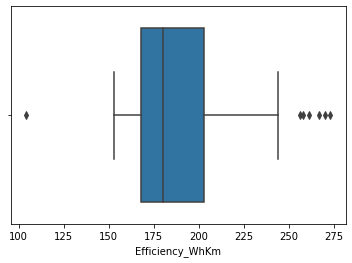

In [45]:
sns.boxplot(x=df['Efficiency_WhKm'])

In [46]:
q1_Efficiency_WhKm = df['Efficiency_WhKm'].quantile(0.25)
q2_Efficiency_WhKm = df['Efficiency_WhKm'].quantile(0.50)
q3_Efficiency_WhKm = df['Efficiency_WhKm'].quantile(0.75)
median =  df['Efficiency_WhKm'].median()
print("Q1 :",q1_Efficiency_WhKm)
print("Q2 :",q2_Efficiency_WhKm)
print("Q3 :",q3_Efficiency_WhKm)
print("median :",median)

iqr = q3_Efficiency_WhKm - q1_Efficiency_WhKm

upper_tail = q3_Efficiency_WhKm + 1.5*iqr
lower_tail = q1_Efficiency_WhKm - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 168.0
Q2 : 180.0
Q3 : 203.0
median : 180.0
Upper Tail : 255.5
Lower Tail : 115.5


In [47]:
median_Efficiency_WhKm= df.loc[(df['Efficiency_WhKm'] <= upper_tail) & 
                            (df['Efficiency_WhKm'] >= lower_tail),'Efficiency_WhKm'].median()
median_Efficiency_WhKm

180.0

<AxesSubplot:xlabel='Efficiency_WhKm'>

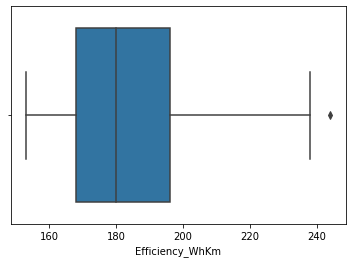

In [48]:
df.loc[(df['Efficiency_WhKm'] > upper_tail) |
                            (df['Efficiency_WhKm'] < lower_tail),'Efficiency_WhKm'] = median_Efficiency_WhKm
sns.boxplot(x=df['Efficiency_WhKm'])

<AxesSubplot:xlabel='PowerTrain'>

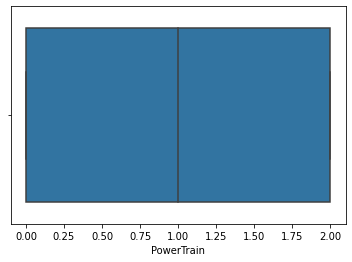

In [49]:
sns.boxplot(x=df['PowerTrain'])

# TRAIN TEST SPLIT

In [50]:
df = df.select_dtypes(exclude=object) 
x = df.drop('PriceEuro',axis = 1)
y = df['PriceEuro']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=25)

In [51]:
x_train

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,PlugType_Type 1 CHAdeMO,PlugType_Type 2,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
65,4.0,250,425,197,890,1,0,4,0,0,...,1,0,0,0,0,0,0,1,0,0
92,7.9,167,365,175,320,1,2,5,0,0,...,0,0,0,1,0,0,0,0,0,0
94,9.0,150,250,168,330,1,2,4,0,0,...,0,0,0,1,0,0,0,0,0,0
93,5.7,200,420,207,500,1,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0
51,2.1,160,340,206,920,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3.7,241,410,177,900,1,0,7,0,0,...,0,0,0,0,0,1,0,0,0,0
15,7.9,160,440,175,590,1,1,4,0,0,...,0,0,0,0,1,0,0,0,0,0
90,4.5,210,320,180,510,1,0,5,0,0,...,0,0,0,0,0,0,1,0,0,0
62,7.6,160,440,198,520,1,2,5,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
x_train.shape

(92, 29)

# MODEL TRAINING 

In [53]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
model.intercept_

94839.03296254514

# Model Evaluation

In [55]:
# Testing Data Evaluation
y_pred = model.predict(x_test)
y_pred[20:25]

array([], dtype=float64)

In [56]:
y_test[20:25]

Series([], Name: PriceEuro, dtype: int64)

In [57]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print('R1-Squared :',r2_test)

MSE : 18174443.360009752
RMSE : 4263.149464892094
MAE : 3459.7850576983355
R1-Squared : 0.9168887270428564


In [58]:
# Training Data Evaluation

y_pred_train = model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print('R2-Squared :',r2_train)

MSE : 90058225.41690296
RMSE : 9489.901233253324
MAE : 6318.789014074544
R2-Squared : 0.9277199887754918


# Model Training with KNN 

In [59]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=2)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# EVALUATION

In [60]:
# Testing Data Evaluation
y_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 38941044.27272728
RMSE : 6240.2759772887675
MAE : 4422.939393939394
R1-Squared : 0.8219235827102044


In [61]:
# Training Data Evaluation
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 209132450.10144934
RMSE : 14461.412451812905
MAE : 7424.73188405797
R2-Squared : 0.8321519686762057


# Normalization

In [62]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x_train) ## We are storing Minimum and Maximum Values
array = normal_scaler.transform(x_train)
normal_train_xdf = pd.DataFrame(array,columns= x_train.columns)
normal_train_xdf.head(3)

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,PlugType_Type 1 CHAdeMO,PlugType_Type 2,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,0.159664,0.920290,0.640777,0.483516,0.946809,1.0,0.0,0.4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.487395,0.318841,0.524272,0.241758,0.340426,1.0,1.0,0.6,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.579832,0.195652,0.300971,0.164835,0.351064,1.0,1.0,0.4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
knn_reg = KNeighborsRegressor(n_neighbors=5, p = 2)
knn_reg.fit(normal_train_xdf, y_train)

# Training Data Evaluation
y_pred_train = knn_reg.predict(normal_train_xdf)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 300038001.06304353
RMSE : 17321.60503715067
MAE : 8014.554347826087
R2-Squared : 0.7591919007484084


In [65]:
array = normal_scaler.transform(x_test)
normal_test_df = pd.DataFrame(array,columns= x_test.columns)

# Testing Data Evaluation
y_pred = knn_reg.predict(normal_test_df)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 59404628.654545456
RMSE : 7707.439824905898
MAE : 5721.781818181818
R1-Squared : 0.7283441253618106


# Standardization

In [66]:
std_scaler = StandardScaler()
std_scaler.fit(x_train) ## We are storing mean and std Values
array = std_scaler.transform(x_train)
std_train_xdf = pd.DataFrame(array,columns= x_train.columns)
std_train_xdf.head(3)

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,PlugType_Type 1 CHAdeMO,PlugType_Type 2,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,-1.188091,1.886003,0.943341,0.561368,2.028411,0.213201,-1.074664,-1.153672,-0.104828,-0.308607,...,2.863564,-0.104828,-0.264135,-0.527046,-0.610847,-0.423659,-0.329293,2.581989,-0.239732,-0.104828
1,0.282879,-0.297700,0.334663,-0.478164,-0.572955,0.213201,1.224617,0.140692,-0.104828,-0.308607,...,-0.349215,-0.104828,-0.264135,1.897367,-0.610847,-0.423659,-0.329293,-0.387298,-0.239732,-0.104828
2,0.697768,-0.744964,-0.831971,-0.808925,-0.527317,0.213201,1.224617,-1.153672,-0.104828,-0.308607,...,-0.349215,-0.104828,-0.264135,1.897367,-0.610847,-0.423659,-0.329293,-0.387298,-0.239732,-0.104828


In [67]:
knn_reg = KNeighborsRegressor(n_neighbors=5, p=2)
knn_reg.fit(std_train_xdf, y_train)

# Training Data Evaluation
y_pred_train = knn_reg.predict(std_train_xdf)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 343502776.976087
RMSE : 18533.82790942246
MAE : 8712.463043478261
R2-Squared : 0.7243074193329455


In [68]:
array = std_scaler.transform(x_test)
std_test_df = pd.DataFrame(array,columns= x_test.columns)

# Testing Data Evaluation
y_pred = knn_reg.predict(std_test_df)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 41929372.32363638
RMSE : 6475.289362154897
MAE : 4637.2181818181825
R1-Squared : 0.8082580335979227


# model Training with Decision Tree

In [69]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [70]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 52751209.90909091
********************************************************************************
RMSE : 7263.00281626621
********************************************************************************
MAE : 4752.818181818182
********************************************************************************
R1-Squared : 0.7587700421559607


In [71]:
# Testing Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 170288.39673913043
********************************************************************************
RMSE : 412.6601467783513
********************************************************************************
MAE : 90.79347826086956
********************************************************************************
R2-Squared : 0.9998633278951398


# hypertuning

In [72]:
dt_reg = DecisionTreeRegressor()

hyperparameters ={ "criterion" :['mse','mae'],
     'max_depth': np.arange(3,14),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

gscv_dt_reg = GridSearchCV(dt_reg,hyperparameters, cv = 5)
gscv_dt_reg.fit(x_train, y_train)
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=2,
                      min_samples_split=4)

In [73]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=2,
                      min_samples_split=4)

In [74]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 49482588.63636363
********************************************************************************
RMSE : 7034.386159172926
********************************************************************************
MAE : 5175.181818181818
********************************************************************************
R1-Squared : 0.7737173651308645


In [75]:
# Testing Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 167253494.91847825
********************************************************************************
RMSE : 12932.652277026482
********************************************************************************
MAE : 5558.641304347826
********************************************************************************
R2-Squared : 0.8657636830607942


# Pruning 

In [76]:
decision_tree_model = DecisionTreeRegressor(random_state=10)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=10)

In [77]:
result = decision_tree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 6.28260870e+00, 1.40289855e+01, 4.20869565e+01,
       5.43478261e+01, 1.08048913e+02, 2.34782609e+02, 6.58711957e+02,
       6.69570652e+02, 1.29426087e+03, 2.08913043e+03, 3.40203261e+03,
       4.61000543e+03, 4.80217391e+03, 5.43478261e+03, 8.23689275e+03,
       8.66937640e+03, 8.92081304e+03, 9.08985507e+03, 1.13165707e+04,
       1.56880489e+04, 1.79231304e+04, 1.96195652e+04, 2.17391304e+04,
       2.26449275e+04, 2.29512228e+04, 2.39238333e+04, 2.45645435e+04,
       3.02481047e+04, 3.25424402e+04, 4.62214300e+04, 4.66960145e+04,
       5.08186993e+04, 5.36115942e+04, 7.52033496e+04, 7.56426091e+04,
       8.68261359e+04, 9.10915000e+04, 9.62080036e+04, 1.02886962e+05,
       1.06296377e+05, 1.28230631e+05, 1.35326630e+05, 1.41530797e+05,
       1.59090596e+05, 1.80561479e+05, 2.05822973e+05, 2.40500877e+05,
       2.63563348e+05, 2.71739130e+05, 2.75135870e+05, 3.19426533e+05,
       4.47516003e+05, 4.88699756e+05, 6.15888014e+05, 8.42617754e+05,
      

In [78]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_reg_model = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha)
    dt_reg_model.fit(x_train, y_train)
    train_accuracy_list.append(dt_reg_model.score(x_train, y_train))
    test_accuracy_list.append(dt_reg_model.score(x_test, y_test))


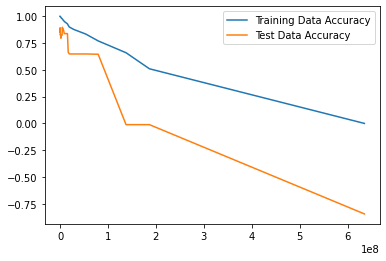

In [79]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [80]:
decision_tree_model = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha_list[50])
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=275135.86956521735, random_state=10)

In [81]:
# Testing Data Evaluation
y_pred = decision_tree_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 32472888.19233586
********************************************************************************
RMSE : 5698.49876654684
********************************************************************************
MAE : 4747.201515151516
********************************************************************************
R1-Squared : 0.8515022979906779


In [82]:
# Testing Data Evaluation
y_pred_train = decision_tree_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 3717907.8058876805
********************************************************************************
RMSE : 1928.1876998590362
********************************************************************************
MAE : 1572.2226449275363
********************************************************************************
R2-Squared : 0.9970160369394664


# Model Training with Random Forest 

In [83]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
## Training Data Evaluation 

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE  :",mae)
print("*"*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-squared :",r2_train)

MSE :  70360725.39972256
********************************************************************************
RMSE : 8388.130029972268
********************************************************************************
MAE  : 3733.177914855072
********************************************************************************
R2-squared : 0.9435290447028734


In [85]:
## Testing Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test, y_pred)
print("MAE  :",mae)
print("*"*80)

r2_test = r2_score(y_test, y_pred)
print("R1-squared :",r2_test)

MSE :  11694910.569331728
********************************************************************************
RMSE : 3419.782240045662
********************************************************************************
MAE  : 2753.7411818181813
********************************************************************************
R1-squared : 0.9465194677336962


# hypertuning 

In [86]:
rf_reg = RandomForestRegressor()

hyperparameters = {
                "n_estimators" :np.arange(90,120),
                "criterion" : ['mse','mae'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(10,15), 
                "min_samples_leaf" : np.arange(3,8),
                "random_state" : [11]
                    }

rscv_rf_reg = RandomizedSearchCV(rf_reg,hyperparameters,cv = 5)
rscv_rf_reg.fit(x_train, y_train)
rscv_rf_reg.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=3, min_samples_leaf=4,
                      min_samples_split=12, n_estimators=118, random_state=11)

In [87]:
rf_reg = rscv_rf_reg.best_estimator_
rf_reg.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=3, min_samples_leaf=4,
                      min_samples_split=12, n_estimators=118, random_state=11)

In [88]:
## Training Data Evaluation 

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE  :",mae)
print("*"*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-squared :",r2_train)

MSE :  330373555.48135096
********************************************************************************
RMSE : 18176.180992753976
********************************************************************************
MAE  : 7907.1474760501105
********************************************************************************
R2-squared : 0.7348448274665779


In [89]:
## Testing Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test, y_pred)
print("MAE  :",mae)
print("*"*80)

r2_test = r2_score(y_test, y_pred)
print("R1-squared :",r2_test)

MSE :  17848345.705993246
********************************************************************************
RMSE : 4224.730252453196
********************************************************************************
MAE  : 3569.7037750385207
********************************************************************************
R1-squared : 0.918379963423349


# Result 

In [ ]:
We can see the Linear Regression gives the best result for our model with accuracy 0.91 and 0.92 r2 values.

# Testing on Single Row

In [91]:
model.n_features_in_

29

In [92]:
x.head(1).T

,0
AccelSec,4.6
TopSpeed_KmH,233.0
Range_Km,450.0
Efficiency_WhKm,161.0
FastCharge_KmH,940.0
RapidCharge,1.0
PowerTrain,0.0
Seats,5.0
PlugType_Type 1 CHAdeMO,0.0
PlugType_Type 2,0.0


In [93]:
AccelSec=4.6
TopSpeed_KmH=233.0
Range_Km=450.0
Efficiency_WhKm=161.0
FastCharge_KmH=940.0
RapidCharge=1.0
PowerTrain=0.0
Seats=5.0
PlugType='Type 2 CCS'
BodyStyle='Sedan'
Segment='D'

In [94]:
column_names = x.columns
column_names

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'Seats',
       'PlugType_Type 1 CHAdeMO', 'PlugType_Type 2', 'PlugType_Type 2 CCS',
       'PlugType_Type 2 CHAdeMO', 'BodyStyle_Cabrio', 'BodyStyle_Hatchback',
       'BodyStyle_Liftback', 'BodyStyle_MPV', 'BodyStyle_Pickup',
       'BodyStyle_SPV', 'BodyStyle_SUV', 'BodyStyle_Sedan',
       'BodyStyle_Station', 'Segment_A', 'Segment_B', 'Segment_C', 'Segment_D',
       'Segment_E', 'Segment_F', 'Segment_N', 'Segment_S'],
      dtype='object')

In [95]:
lable_encodded_columns={'RapidCharge':RapidCharge_values,
                       'PowerTrain':PowerTrain_values,
                        'columns':list(x.columns),
                       }
lable_encodded_columns

{'RapidCharge': {'YES': 1, 'NO': 0},
 'PowerTrain': {'AWD': 0, 'RWD': 1, 'FWD': 2},
 'columns': ['AccelSec',
  'TopSpeed_KmH',
  'Range_Km',
  'Efficiency_WhKm',
  'FastCharge_KmH',
  'RapidCharge',
  'PowerTrain',
  'Seats',
  'PlugType_Type 1 CHAdeMO',
  'PlugType_Type 2',
  'PlugType_Type 2 CCS',
  'PlugType_Type 2 CHAdeMO',
  'BodyStyle_Cabrio',
  'BodyStyle_Hatchback',
  'BodyStyle_Liftback',
  'BodyStyle_MPV',
  'BodyStyle_Pickup',
  'BodyStyle_SPV',
  'BodyStyle_SUV',
  'BodyStyle_Sedan',
  'BodyStyle_Station',
  'Segment_A',
  'Segment_B',
  'Segment_C',
  'Segment_D',
  'Segment_E',
  'Segment_F',
  'Segment_N',
  'Segment_S']}

In [96]:
import json
with open("Label_Encoded_columns.json",'w') as f:
    json.dump(lable_encodded_columns,f)

In [97]:
test_array=np.zeros(len(x.columns),dtype=int)
# array

In [98]:
test_array[1]==AccelSec
test_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [99]:
test_array = np.zeros(x.shape[1])                                          
test_array[0] = AccelSec
test_array[1] = TopSpeed_KmH                                                         
test_array[2] = Range_Km
test_array[3] = Efficiency_WhKm
test_array[4] = FastCharge_KmH
test_array[5] = RapidCharge
test_array[6] = PowerTrain
test_array[7] = Seats


# test_array[PlugType_index] = 1
# test_array[BodyStyle_index] = 2
# test_array[Segment_index] = 3

PlugType_index = np.where(column_names == PlugType)[0]
BodyStyle_index = np.where(column_names == BodyStyle)[0]
Segment_index = np.where(column_names == Segment)[0]

In [100]:
test_array

array([  4.6, 233. , 450. , 161. , 940. ,   1. ,   0. ,   5. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ])

In [101]:
PlugType =  'PlugType_' + PlugType
PlugType_index = np.where(column_names == PlugType)[0][0]

In [102]:
BodyStyle =  'BodyStyle_' + BodyStyle
BodyStyle_index = np.where(column_names == BodyStyle)[0][0]

In [103]:
Segment =  'Segment_' + Segment
Segment_index = np.where(column_names == Segment)[0][0]

In [104]:
model.predict([test_array])

array([71938.52895602])

In [105]:
with open('Linear_Model.pkl','wb') as f:
    pickle.dump(model,f)